In [48]:
# import packages

# import clevercsv as csv
import re
from datetime import datetime
import time
import scipy.stats as stats
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.io as pio
import plotly.express as px
import pandas_profiling as pdp
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
import csv
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from io import StringIO
%matplotlib inline

In [49]:
plt.style.use('dark_background')
pio.templates.default = "plotly_dark"

In [50]:
for_pd = StringIO()
with open('accre-jobs-2020.csv') as accre:
    for line in accre:
        new_line = re.sub(r',', '|', line.rstrip(), count=12)
        print (new_line, file=for_pd)

for_pd.seek(0)

accre = pd.read_csv(for_pd, sep='|')#[1000000:1005000] # add this to subset
print (accre.head())

      JOBID  ACCOUNT      USER    REQMEM    USEDMEM      REQTIME     USEDTIME  \
0  15925210  treviso  arabella  122880Mn  65973.49M  13-18:00:00  13-18:00:28   
1  15861126  treviso  arabella  122880Mn  67181.12M  13-18:00:00  12-14:50:56   
2  15861125  treviso  arabella  122880Mn  69111.86M  13-18:00:00  13-18:00:20   
3  16251645  treviso  arabella  122880Mn  65317.33M  13-18:00:00  12-03:50:32   
4  16251646  treviso  arabella  122880Mn  65876.11M  13-18:00:00  13-18:00:03   

   NODES  CPUS   PARTITION EXITCODE      STATE NODELIST  
0      1    24  production      0:0  COMPLETED   cn1531  
1      1    24  production      0:0  COMPLETED   cn1441  
2      1    24  production      0:0  COMPLETED   cn1464  
3      1    24  production      0:0  COMPLETED   cn1473  
4      1    24  production      0:0  COMPLETED   cn1440  


In [51]:
accre.shape

(3816290, 13)

In [52]:
#only 0:0
accre = accre[accre['EXITCODE'] == '0:0']

In [53]:
# only production
accre = accre[accre['PARTITION'] == 'production']

In [54]:
accre.shape

(3310591, 13)

In [55]:
# remove columns
accre = accre.drop(["JOBID","USER", "NODELIST"], axis =1) # axis = 1 so that it works across our columns
accre.head()

,ACCOUNT,REQMEM,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,PARTITION,EXITCODE,STATE
0,treviso,122880Mn,65973.49M,13-18:00:00,13-18:00:28,1,24,production,0:0,COMPLETED
1,treviso,122880Mn,67181.12M,13-18:00:00,12-14:50:56,1,24,production,0:0,COMPLETED
2,treviso,122880Mn,69111.86M,13-18:00:00,13-18:00:20,1,24,production,0:0,COMPLETED
3,treviso,122880Mn,65317.33M,13-18:00:00,12-03:50:32,1,24,production,0:0,COMPLETED
4,treviso,122880Mn,65876.11M,13-18:00:00,13-18:00:03,1,24,production,0:0,COMPLETED


In [56]:
#new column is for requested memory per node
accre['RMPN'] = accre['REQMEM'].str.extract('(.*)Mn$')
accre.head()

,ACCOUNT,REQMEM,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,PARTITION,EXITCODE,STATE,RMPN
0,treviso,122880Mn,65973.49M,13-18:00:00,13-18:00:28,1,24,production,0:0,COMPLETED,122880
1,treviso,122880Mn,67181.12M,13-18:00:00,12-14:50:56,1,24,production,0:0,COMPLETED,122880
2,treviso,122880Mn,69111.86M,13-18:00:00,13-18:00:20,1,24,production,0:0,COMPLETED,122880
3,treviso,122880Mn,65317.33M,13-18:00:00,12-03:50:32,1,24,production,0:0,COMPLETED,122880
4,treviso,122880Mn,65876.11M,13-18:00:00,13-18:00:03,1,24,production,0:0,COMPLETED,122880


In [57]:
#new column is for requested memory per core
accre['RMPC'] = accre['REQMEM'].str.extract('(.*)Mc$')
accre.head()

,ACCOUNT,REQMEM,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,PARTITION,EXITCODE,STATE,RMPN,RMPC
0,treviso,122880Mn,65973.49M,13-18:00:00,13-18:00:28,1,24,production,0:0,COMPLETED,122880,NaN
1,treviso,122880Mn,67181.12M,13-18:00:00,12-14:50:56,1,24,production,0:0,COMPLETED,122880,NaN
2,treviso,122880Mn,69111.86M,13-18:00:00,13-18:00:20,1,24,production,0:0,COMPLETED,122880,NaN
3,treviso,122880Mn,65317.33M,13-18:00:00,12-03:50:32,1,24,production,0:0,COMPLETED,122880,NaN
4,treviso,122880Mn,65876.11M,13-18:00:00,13-18:00:03,1,24,production,0:0,COMPLETED,122880,NaN


In [58]:
# change RMPC colum to fill with na with 0
accre['RMPC'] = accre['RMPC'].fillna('0')
accre.head()

,ACCOUNT,REQMEM,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,PARTITION,EXITCODE,STATE,RMPN,RMPC
0,treviso,122880Mn,65973.49M,13-18:00:00,13-18:00:28,1,24,production,0:0,COMPLETED,122880,0
1,treviso,122880Mn,67181.12M,13-18:00:00,12-14:50:56,1,24,production,0:0,COMPLETED,122880,0
2,treviso,122880Mn,69111.86M,13-18:00:00,13-18:00:20,1,24,production,0:0,COMPLETED,122880,0
3,treviso,122880Mn,65317.33M,13-18:00:00,12-03:50:32,1,24,production,0:0,COMPLETED,122880,0
4,treviso,122880Mn,65876.11M,13-18:00:00,13-18:00:03,1,24,production,0:0,COMPLETED,122880,0


In [59]:
# Change RMPN column to fill na with 0
accre['RMPN'] = accre['RMPN'].fillna('0')
accre.head()

,ACCOUNT,REQMEM,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,PARTITION,EXITCODE,STATE,RMPN,RMPC
0,treviso,122880Mn,65973.49M,13-18:00:00,13-18:00:28,1,24,production,0:0,COMPLETED,122880,0
1,treviso,122880Mn,67181.12M,13-18:00:00,12-14:50:56,1,24,production,0:0,COMPLETED,122880,0
2,treviso,122880Mn,69111.86M,13-18:00:00,13-18:00:20,1,24,production,0:0,COMPLETED,122880,0
3,treviso,122880Mn,65317.33M,13-18:00:00,12-03:50:32,1,24,production,0:0,COMPLETED,122880,0
4,treviso,122880Mn,65876.11M,13-18:00:00,13-18:00:03,1,24,production,0:0,COMPLETED,122880,0


In [60]:
accre['RMPC']= accre['RMPC'].astype(str).astype(float)

In [61]:
accre['RMPN']= accre['RMPN'].astype(str).astype(float)

In [62]:
# clean the USEDMEM column
#new column is for requested memory per core
accre['UM'] = accre['USEDMEM'].str.extract('(.*)M$')
accre.head()

,ACCOUNT,REQMEM,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,PARTITION,EXITCODE,STATE,RMPN,RMPC,UM
0,treviso,122880Mn,65973.49M,13-18:00:00,13-18:00:28,1,24,production,0:0,COMPLETED,122880.0,0.0,65973.49
1,treviso,122880Mn,67181.12M,13-18:00:00,12-14:50:56,1,24,production,0:0,COMPLETED,122880.0,0.0,67181.12
2,treviso,122880Mn,69111.86M,13-18:00:00,13-18:00:20,1,24,production,0:0,COMPLETED,122880.0,0.0,69111.86
3,treviso,122880Mn,65317.33M,13-18:00:00,12-03:50:32,1,24,production,0:0,COMPLETED,122880.0,0.0,65317.33
4,treviso,122880Mn,65876.11M,13-18:00:00,13-18:00:03,1,24,production,0:0,COMPLETED,122880.0,0.0,65876.11


In [63]:
# 
accre.isnull().sum()

ACCOUNT           0
REQMEM            0
USEDMEM           0
REQTIME           0
USEDTIME          0
NODES             0
CPUS              0
PARTITION         0
EXITCODE          0
STATE             0
RMPN              0
RMPC              0
UM           545099
dtype: int64

In [64]:
accre['UM'] = accre['UM'].fillna('0')
accre.head()

,ACCOUNT,REQMEM,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,PARTITION,EXITCODE,STATE,RMPN,RMPC,UM
0,treviso,122880Mn,65973.49M,13-18:00:00,13-18:00:28,1,24,production,0:0,COMPLETED,122880.0,0.0,65973.49
1,treviso,122880Mn,67181.12M,13-18:00:00,12-14:50:56,1,24,production,0:0,COMPLETED,122880.0,0.0,67181.12
2,treviso,122880Mn,69111.86M,13-18:00:00,13-18:00:20,1,24,production,0:0,COMPLETED,122880.0,0.0,69111.86
3,treviso,122880Mn,65317.33M,13-18:00:00,12-03:50:32,1,24,production,0:0,COMPLETED,122880.0,0.0,65317.33
4,treviso,122880Mn,65876.11M,13-18:00:00,13-18:00:03,1,24,production,0:0,COMPLETED,122880.0,0.0,65876.11


In [65]:
accre['UM']= accre['UM'].astype(str).astype(float)

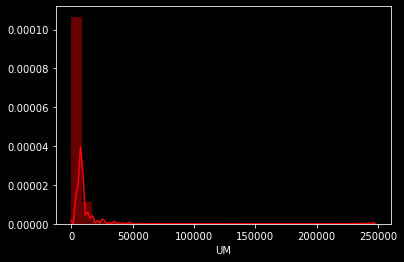

In [66]:
sns.distplot(accre.UM, bins=30, kde=True, color="red");

In [67]:
# what is per core??? assume you multiply cpus by node this column will be RMPN times CPUS 
#3.5 is the average node to core ratio
accre['RMPN'] = (accre['RMPN'] /accre['CPUS'])/ accre['NODES']
accre.head()

,ACCOUNT,REQMEM,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,PARTITION,EXITCODE,STATE,RMPN,RMPC,UM
0,treviso,122880Mn,65973.49M,13-18:00:00,13-18:00:28,1,24,production,0:0,COMPLETED,5120.0,0.0,65973.49
1,treviso,122880Mn,67181.12M,13-18:00:00,12-14:50:56,1,24,production,0:0,COMPLETED,5120.0,0.0,67181.12
2,treviso,122880Mn,69111.86M,13-18:00:00,13-18:00:20,1,24,production,0:0,COMPLETED,5120.0,0.0,69111.86
3,treviso,122880Mn,65317.33M,13-18:00:00,12-03:50:32,1,24,production,0:0,COMPLETED,5120.0,0.0,65317.33
4,treviso,122880Mn,65876.11M,13-18:00:00,13-18:00:03,1,24,production,0:0,COMPLETED,5120.0,0.0,65876.11


In [68]:
accre = accre.dropna() 

In [69]:
accre.isnull().sum()

ACCOUNT      0
REQMEM       0
USEDMEM      0
REQTIME      0
USEDTIME     0
NODES        0
CPUS         0
PARTITION    0
EXITCODE     0
STATE        0
RMPN         0
RMPC         0
UM           0
dtype: int64

In [70]:
# what is per core??? update RMPC to add the RMPN column to get the toal per core
accre['RMPC'] = accre['RMPC'] + accre['RMPN']
accre.head()

,ACCOUNT,REQMEM,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,PARTITION,EXITCODE,STATE,RMPN,RMPC,UM
0,treviso,122880Mn,65973.49M,13-18:00:00,13-18:00:28,1,24,production,0:0,COMPLETED,5120.0,5120.0,65973.49
1,treviso,122880Mn,67181.12M,13-18:00:00,12-14:50:56,1,24,production,0:0,COMPLETED,5120.0,5120.0,67181.12
2,treviso,122880Mn,69111.86M,13-18:00:00,13-18:00:20,1,24,production,0:0,COMPLETED,5120.0,5120.0,69111.86
3,treviso,122880Mn,65317.33M,13-18:00:00,12-03:50:32,1,24,production,0:0,COMPLETED,5120.0,5120.0,65317.33
4,treviso,122880Mn,65876.11M,13-18:00:00,13-18:00:03,1,24,production,0:0,COMPLETED,5120.0,5120.0,65876.11


# Concerns:
* equations
* a few 0's for used memory(UM)
* odd stuff

# Question 3
What groups are best optimizing their memory usage in terms of percent of actual memory used of the memory requested for a job? What is the average percent for each group?

In [71]:
#convert used memory to cores 
accre['UM'] = (accre['UM'] /accre['CPUS'])/ accre['NODES']
accre.head()

,ACCOUNT,REQMEM,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,PARTITION,EXITCODE,STATE,RMPN,RMPC,UM
0,treviso,122880Mn,65973.49M,13-18:00:00,13-18:00:28,1,24,production,0:0,COMPLETED,5120.0,5120.0,2748.895417
1,treviso,122880Mn,67181.12M,13-18:00:00,12-14:50:56,1,24,production,0:0,COMPLETED,5120.0,5120.0,2799.213333
2,treviso,122880Mn,69111.86M,13-18:00:00,13-18:00:20,1,24,production,0:0,COMPLETED,5120.0,5120.0,2879.660833
3,treviso,122880Mn,65317.33M,13-18:00:00,12-03:50:32,1,24,production,0:0,COMPLETED,5120.0,5120.0,2721.555417
4,treviso,122880Mn,65876.11M,13-18:00:00,13-18:00:03,1,24,production,0:0,COMPLETED,5120.0,5120.0,2744.837917


In [72]:
# PERCENT of request to actual used
accre['PRU'] = ((accre['UM'] - accre['RMPC'])/accre['RMPC']) * 100
accre.head()

,ACCOUNT,REQMEM,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,PARTITION,EXITCODE,STATE,RMPN,RMPC,UM,PRU
0,treviso,122880Mn,65973.49M,13-18:00:00,13-18:00:28,1,24,production,0:0,COMPLETED,5120.0,5120.0,2748.895417,-46.310636
1,treviso,122880Mn,67181.12M,13-18:00:00,12-14:50:56,1,24,production,0:0,COMPLETED,5120.0,5120.0,2799.213333,-45.327865
2,treviso,122880Mn,69111.86M,13-18:00:00,13-18:00:20,1,24,production,0:0,COMPLETED,5120.0,5120.0,2879.660833,-43.756624
3,treviso,122880Mn,65317.33M,13-18:00:00,12-03:50:32,1,24,production,0:0,COMPLETED,5120.0,5120.0,2721.555417,-46.844621
4,treviso,122880Mn,65876.11M,13-18:00:00,13-18:00:03,1,24,production,0:0,COMPLETED,5120.0,5120.0,2744.837917,-46.389884


In [73]:
accre.groupby('ACCOUNT')['PRU'].mean().sort_values(ascending=False)

ACCOUNT
horn            -19.547397
strawberries    -33.719537
jicama          -41.028465
shallots        -43.005425
chasselas       -47.021291
                   ...    
with           -100.000000
wa             -100.000000
flamingo       -100.000000
florence       -100.000000
hass           -100.000000
Name: PRU, Length: 139, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002583CDB2400>]],
      dtype=object)

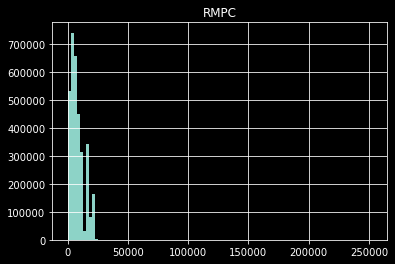

In [43]:
accre.hist(column='RMPC', bins=100)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002583BFADBB0>]],
      dtype=object)

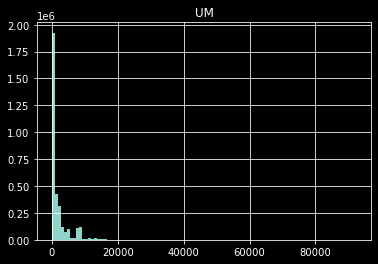

In [74]:
accre.hist(column='UM', bins=100)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000258668FE910>]],
      dtype=object)

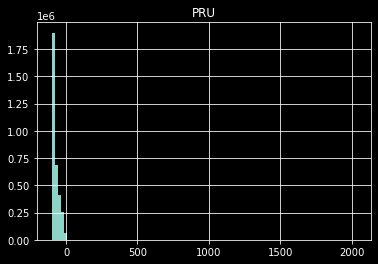

In [46]:
accre.hist(column='PRU', bins=100)

# Answer 1:
x is the best group for using 

# Answer 2:
The average percent for each group is

# Question 4

In [ ]:
accre['hours_min_sec_req'] = accre['REQTIME'].str[-8:]
accre['hours_min_sec_used'] = accre['USEDTIME'].str[-8:]

In [ ]:
accre['day_req'] = accre['REQTIME'].str.extract('(.*?)-')
accre['day_used'] = accre['USEDTIME'].str.extract('(.*?)-')

In [ ]:
accre['day_req'] = accre['day_req'].fillna(0)
accre['day_used'] = accre['day_used'].fillna(0)

In [ ]:
accre['hours_min_sec_req'] =  pd.to_timedelta(accre['hours_min_sec_req'], unit='s')
accre['hours_min_sec_used'] =  pd.to_timedelta(accre['hours_min_sec_used'], unit='s')
accre['hours_min_sec_req'] = accre['hours_min_sec_req'].dt.total_seconds()
accre['hours_min_sec_used'] = accre['hours_min_sec_used'].dt.total_seconds()

In [ ]:
accre.head()

In [ ]:
# convert days to seconds
accre['day_req']= accre['day_req'] * 86400

In [ ]:
accre['day_used']= accre['day_used'] * 86400

In [ ]:
accre.head()

In [ ]:
# REPLACE - WITH :
#clean_accre_df['REQTIME'] = clean_accre_df['REQTIME'].replace('-',':',regex=True)
#clean_accre_df['USEDTIME'] = clean_accre_df['USEDTIME'].replace('-',':',regex=True)

In [ ]:
# gather the days and nothing else
#(\d{2})[\.-]
accre['RD'] = accre['USEDTIME'].str.extract('(\d{2})[\.-]')
accre.head()

In [ ]:
accre.isnull().sum()

In [ ]:
accre['RD'] = accre['RD'].fillna('0')

In [ ]:
# gather minutes
# [\.:](\d{2})[\.:]
accre['RM'] = accre['USEDTIME'].str.extract('[\.:](\d{2})[\.:]')
accre.head()

In [ ]:
# gather hours hh mm ss
#^(\d{2})[\.:]
accre['RH1'] = accre['USEDTIME'].str.extract('^(\d{2})[\.:]')
accre.head()

In [ ]:
# gather hours for days hh mm ss
#[\.-](\d{2})[\.:]
accre['RH2'] = accre['USEDTIME'].str.extract('[\.-](\d{2})[\.:]')
accre.head()

In [ ]:
accre['RS'] = accre['REQTIME'].str[-2:]
accre.head()

In [ ]:
# FILL NA

In [ ]:
accre['RM'] = accre['RM'].fillna('0')

In [ ]:
accre['RH1'] = accre['RH1'].fillna('0')

In [ ]:
accre['RH2'] = accre['RH2'].fillna('0')

In [ ]:
accre['RS'] = accre['RS'].fillna('0')

In [ ]:
# CONVERT TO INTEGER

In [ ]:
accre['RD']= accre['RD'].astype(str).astype(float)

In [ ]:
accre['RM']= accre['RM'].astype(str).astype(float)

In [ ]:
accre['RH1']= accre['RH1'].astype(str).astype(float)

In [ ]:
accre['RH2']= accre['RH2'].astype(str).astype(float)

In [ ]:
accre['RS']= accre['RS'].astype(str).astype(float)

In [ ]:
# CONVERT TO SECONDS

In [ ]:
accre['RD']= accre['RD'] * 86400
accre.head()

In [ ]:
accre['RH'] = accre['RH1'] + accre['RH2']
accre.head()

In [ ]:
accre['RH']= accre['RH'] *3600

In [ ]:
accre['RM']= accre['RM'] * 60

In [ ]:
accre['RT'] = accre['RM'] + accre['RH'] + accre['RD'] +accre['RS']
accre.head()

In [ ]:
accre['RT'] = accre['RT'] + accre['RS']
accre.head()

In [ ]:
# extract requested days
#clean_accre_df['RD'] = clean_accre_df['USEDTIME'].str.extract('(^\(?(\d{2})')
#clean_accre_df.head()

In [ ]:
re.findall('[\.-](\d{2})[\.:]', x)

In [ ]:
# minute requested
clean_accre_df['RM'] = clean_accre_df['USEDTIME'].str.extract('[\.:](\d{2})[\.:]')
clean_accre_df.head()

In [ ]:
# convert days to minutes

In [ ]:
# convert hours to minutes